<div class="head0">
    <div class="head0__name">
        Grid module
    </div>
    <div class="head0__note">
        Examples for grid module. Construction and representation of uniform or Chebyshev multi dimensional spatial or temporal grid.
    </div>
</div>

In [1]:
import numpy as np

from fpcross import ij, Grid

ij()

Start |  2:05PM MSK on Jan 17, 2020 | python 3.7.4    |
-------------------------------------------------------


<div class="head1">
    <div class="head1__name">
        Grid construction
    </div>
</div>

In [2]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 2 
Mean             : Poi 6   | Min -2.500 | Max 2.500  | 
Dim. # 1         : Poi 5   | Min -4.000 | Max 3.000  | 
Dim. # 2         : Poi 7   | Min -1.000 | Max 2.000  | 


In [3]:
GR = Grid(n=5, l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 2 
Mean             : Poi 5   | Min -2.500 | Max 2.500  | 
Dim. # 1         : Poi 5   | Min -4.000 | Max 3.000  | 
Dim. # 2         : Poi 5   | Min -1.000 | Max 2.000  | 


In [5]:
GR = Grid(d=2, n=5, l=[-4., 3.])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 2 
                 : Poi 5   | Min -4.000 | Max 3.000  | 


In [6]:
GR = Grid(d=20, n=np.arange(20)+10, l=[-4., 3.])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimensions       : 20
Mean             : Poi 20  | Min -4.000 | Max 3.000  | 
Dim. # 1         : Poi 10  | Min -4.000 | Max 3.000  | 
Dim. # 2         : Poi 11  | Min -4.000 | Max 3.000  | 
Dim. # 3         : Poi 12  | Min -4.000 | Max 3.000  | 
Dim. # 4         : Poi 13  | Min -4.000 | Max 3.000  | 
Dim. # 5         : Poi 14  | Min -4.000 | Max 3.000  | 
 ...             : ...
Dim. # 16        : Poi 25  | Min -4.000 | Max 3.000  | 
Dim. # 17        : Poi 26  | Min -4.000 | Max 3.000  | 
Dim. # 18        : Poi 27  | Min -4.000 | Max 3.000  | 
Dim. # 19        : Poi 28  | Min -4.000 | Max 3.000  | 
Dim. # 20        : Poi 29  | Min -4.000 | Max 3.000  | 


<div class="head1">
    <div class="head1__name">
        Grid instance properies
    </div>
</div>

In [7]:
GR = Grid(n=[8, 7, 11], l=[[-4., 3.], [-1., 2.], [-5., 5.]])
GR.info()
print('='*70)
print('number of the grid dimensions                      : ', GR.d)
print('total number of points for each dimension          : ', GR.n)
print('min and max values of variable for each dimension  : \n', GR.l)
print('kind of the grid                                   : ', GR.k)
print('accuracy for statements checks                     : ', GR.e)
print('grid steps assuming uniformity for each dimension  : ', GR.h)
print('average number of grid points (mean for n)         : ', GR.n0)
print('average min grid limit (mean for l[:, 0])          : ', GR.l1)
print('average max grid limit (mean for l[:, 1])          : ', GR.l2)
print('average grid step assuming uniformity (mean for h) : ', GR.h0)

------------------ Grid
Kind             : Chebyshev
Dimensions       : 3 
Mean             : Poi 9   | Min -3.333 | Max 3.333  | 
Dim. # 1         : Poi 8   | Min -4.000 | Max 3.000  | 
Dim. # 2         : Poi 7   | Min -1.000 | Max 2.000  | 
Dim. # 3         : Poi 11  | Min -5.000 | Max 5.000  | 
number of the grid dimensions                      :  3
total number of points for each dimension          :  [ 8  7 11]
min and max values of variable for each dimension  : 
 [[-4.  3.]
 [-1.  2.]
 [-5.  5.]]
kind of the grid                                   :  c
accuracy for statements checks                     :  1e-20
grid steps assuming uniformity for each dimension  :  [1.  0.5 1. ]
average number of grid points (mean for n)         :  9.0
average min grid limit (mean for l[:, 0])          :  -3.3333333333333335
average max grid limit (mean for l[:, 1])          :  3.3333333333333335
average grid step assuming uniformity (mean for h) :  0.8333333333333334


<div class="head1">
    <div class="head1__name">
        Index transformation
    </div>
    <div class="head1__note">
        We can transform multi index to the flatten index and back.
    </div>
</div>

In [8]:
GR = Grid(n=[5, 7, 8])

print('0         -> ', GR.indm(0))
print('1         -> ', GR.indm(1))
print('5         -> ', GR.indm(5))
print('279       -> ', GR.indm(279))

print('[0, 0, 0] -> ', GR.indf([0, 0, 0]))
print('[1, 0, 0] -> ', GR.indf([1, 0, 0]))
print('[0, 1, 0] -> ', GR.indf([0, 1, 0]))
print('[4, 6, 7] -> ', GR.indf([4, 6, 7]))

0         ->  (0, 0, 0)
1         ->  (1, 0, 0)
5         ->  (0, 1, 0)
279       ->  (4, 6, 7)
[0, 0, 0] ->  0
[1, 0, 0] ->  1
[0, 1, 0] ->  5
[4, 6, 7] ->  279


<div class="head1">
    <div class="head1__name">
        Compute grid points
    </div>
    <div class="head1__note">
        We can find some or all grid points.
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Some points of uniform grid
    </div>
</div>

In [10]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='u')
X = GR.comp([0, 0])
print(X.shape, X.reshape(-1))
X = GR.comp([4, 6])
print(X.shape, X.reshape(-1))
X = GR.comp([
    [0, 4],
    [0, 6],
])
print(X)

(2, 1) [-4. -1.]
(2, 1) [3. 2.]
[[-4.  3.]
 [-1.  2.]]


<div class="head2">
    <div class="head2__name">
        Some points of Chebyshev grid
    </div>
</div>

In [12]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='c')
X = GR.comp([0, 0])
print(X.shape, X.reshape(-1))
X = GR.comp([4, 6])
print(X.shape, X.reshape(-1))
X = GR.comp([
    [0, 4],
    [0, 6],
])
print(X)

(2, 1) [3. 2.]
(2, 1) [-4. -1.]
[[ 3. -4.]
 [ 2. -1.]]


<div class="head2">
    <div class="head2__name">
        Full grid
    </div>
</div>

In [13]:
GR = Grid(n=[3, 4], l=[[-4., 3.], [-1., 2.]])
X = GR.comp()
print(X)

[[ 3.   -0.5  -4.    3.   -0.5  -4.    3.   -0.5  -4.    3.   -0.5  -4.  ]
 [ 2.    2.    2.    1.25  1.25  1.25 -0.25 -0.25 -0.25 -1.   -1.   -1.  ]]


<div class="head1">
    <div class="head1__name">
        Plot grid
    </div>
    <div class="head1__note">
        We can plot 2-dimensional grid (full or some its points).
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Some points of uniform grid
    </div>
</div>

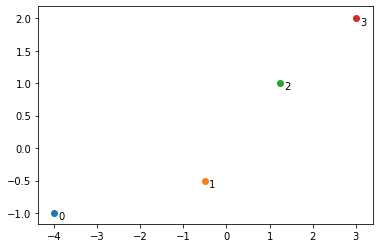

In [14]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='u')
GR.plot(I=[
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

<div class="head2">
    <div class="head2__name">
        Full uniform grid
    </div>
</div>

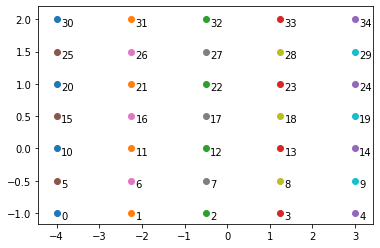

In [15]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='u')
GR.plot()

<div class="head2">
    <div class="head2__name">
        Some points of Chebyshev grid
    </div>
</div>

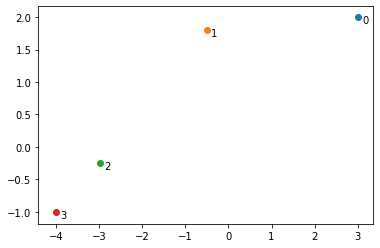

In [16]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='c')
GR.plot(I=[
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

<div class="head2">
    <div class="head2__name">
        Full Chebyshev grid
    </div>
</div>

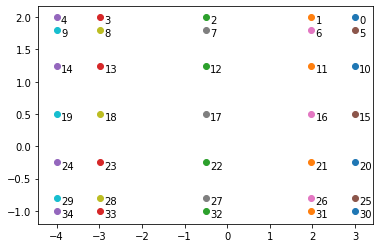

In [17]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='c')
GR.plot()

<div class="head2">
    <div class="head2__name">
        Random points
    </div>
</div>

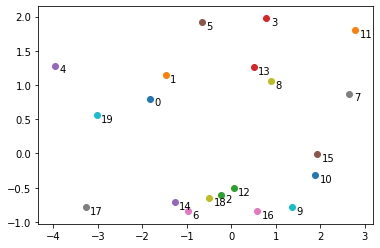

In [18]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='c')
GR.plot(n=20)

<div class="head1">
    <div class="head1__name">
        Find grid point
    </div>
    <div class="head1__note">
        We can find index of the nearest grid point.
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Uniform grid
    </div>
</div>

     Grid index :  27


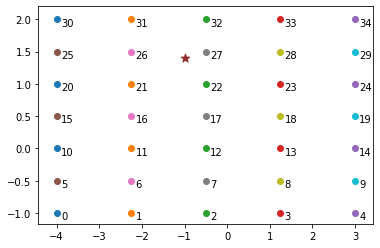

In [20]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='u')
x = [-1., 1.4]
i = GR.find(x, is_f=True)

print('     Grid index : ', i)
GR.plot(x0=x)

<div class="head2">
    <div class="head2__name">
        Chebyshev grid
    </div>
</div>

     Grid index :  13


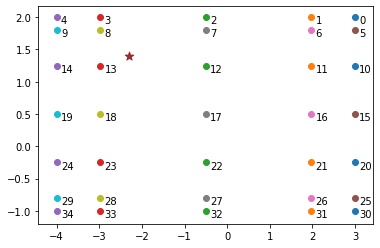

In [21]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='c')
x = [-2.3, 1.4]
i = GR.find(x, is_f=True)

print('     Grid index : ', i)
GR.plot(x0=x)

<div class="head1">
    <div class="head1__name">
        Check if point inside the grid
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Uniform grid
    </div>
</div>

     Point is :  inside


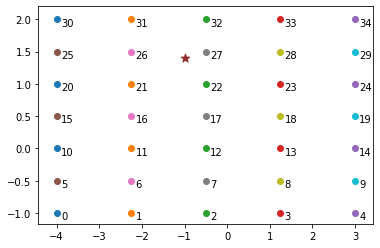

     Point is :  outside


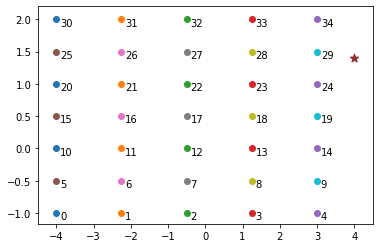

In [22]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='u')

x = [-1., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

x = [4., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

<div class="head2">
    <div class="head2__name">
        Chebyshev grid
    </div>
</div>

     Point is :  inside


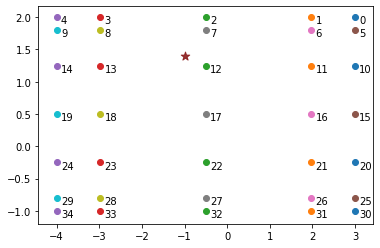

     Point is :  outside


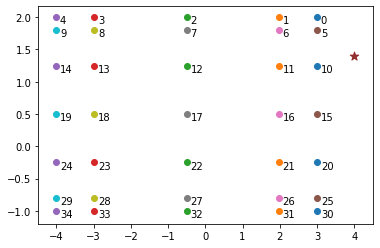

In [23]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='c')
x = [-2.3, 1.4]
i = GR.find(x)

x = [-1., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

x = [4., 1.4]
r = GR.is_out(x)

print('     Point is : ', 'outside' if r else 'inside')
GR.plot(x0=x)

<div class="head1">
    <div class="head1__name">
        Construct sub grid
    </div>
</div>

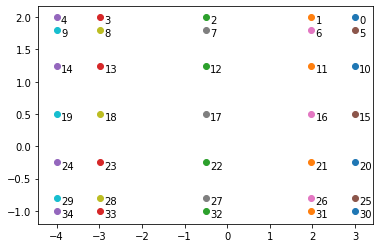

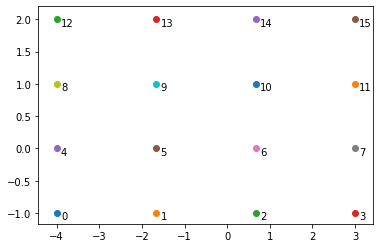

In [25]:
GR1 = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], k='c')
GR1.plot()

N = 23

GR2 = GR1.copy(n=int(N**(1./GR1.d)), k='u')
GR2.plot()

<div class="end"></div>